In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
import folium
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [7]:
병원이동 = pd.read_csv('../../Data/public health/moveHospitalTime.csv', index_col='년도')
병원이동['년도'] = 병원이동.index
병원이동.reset_index(inplace=True,drop=True)
병원 = pd.read_csv('../../Data/public health/hosik_병원수_2009_2022.csv', index_col='시점')
병원['년도'] = 병원.index
병원.reset_index(inplace=True,drop=True)
의료인 = pd.read_csv('../../Data/public health/hosik_의료인_2010_2021.csv', index_col='시점')
의료인['년도'] = 의료인.index
의료인.reset_index(inplace=True,drop=True)
산부인과 = pd.read_csv('../../Data/public health/obgyn.csv', index_col='시점')
산부인과['년도'] = 산부인과.index
산부인과.reset_index(inplace=True,drop=True)
구급차및의료인 = pd.read_csv('../../Data/public health/ambulance(2014_2021).csv', index_col='년도')
구급차및의료인['년도'] = 구급차및의료인.index
구급차및의료인.reset_index(inplace=True,drop=True)
birth = pd.read_csv("../../Data/sangwonKim/출생아수_시도_2013_2021.csv", encoding='euc-kr')
birth.columns = ['년도', '시도별', '출생아수']
people = pd. read_csv("../../Data/sangwonKim/주민등록인구_시도_시_군_구__20230207.csv", encoding='euc-kr')

In [8]:
# 시도별 이름을 바꾸기 위한 변수
preAreaName=[
    '서울','부산','대구', '인천', '광주', '대전', '울산','세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주']
NexAreaName = [
 '서울특별시','부산광역시','대구광역시', '인천광역시','광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도',
 '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']

In [9]:
resultDF = pd.merge(left=병원, right=의료인, how='left',on=['년도', '시도별'])
resultDF.replace(preAreaName,NexAreaName, inplace=True)
resultDF = pd.merge(left=resultDF, right=병원이동, how='left',on=['년도', '시도별'])
resultDF = pd.merge(left=resultDF, right=산부인과, how='left',on=['년도', '시도별'])
구급차및의료인.replace(preAreaName,NexAreaName, inplace=True)
resultDF = pd.merge(left=resultDF, right=구급차및의료인, how='left',on=['년도', '시도별'])
resultDF = pd.merge(left=resultDF, right=birth, how='left',on=['년도', '시도별'])
resultDF.set_index(keys='년도', inplace=True, drop=True)
resultDF

,병원,상급종합병원,종합병원,의원,시도별,의사,치과의사,한의사,약사,간호사,...,종합병원 승용차,산부인과,소아청소년과,구급차 소계,특수구급차,일반구급차,1급 응급구조사,2급 응급구조사,의사/간호사,출생아수
년도,,,,,,,,,,,,,,,,,,,,,
2009,167,17,42,7142,서울특별시,NaN,NaN,NaN,NaN,NaN,...,NaN,459,521,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,103,4,22,2065,부산광역시,NaN,NaN,NaN,NaN,NaN,...,NaN,107,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,98,4,7,1460,대구광역시,NaN,NaN,NaN,NaN,NaN,...,NaN,98,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,50,2,12,1313,인천광역시,NaN,NaN,NaN,NaN,NaN,...,NaN,80,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,49,2,17,826,광주광역시,NaN,NaN,NaN,NaN,NaN,...,NaN,49,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,62,2,12,1190,전라북도,NaN,NaN,NaN,NaN,NaN,...,NaN,50,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022,73,1,25,958,전라남도,NaN,NaN,NaN,NaN,NaN,...,NaN,18,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022,56,0,20,1296,경상북도,NaN,NaN,NaN,NaN,NaN,...,NaN,50,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
resultDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 2009 to 2022
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   병원              235 non-null    int64  
 1   상급종합병원          235 non-null    int64  
 2   종합병원            235 non-null    int64  
 3   의원              235 non-null    int64  
 4   시도별             235 non-null    object 
 5   의사              202 non-null    float64
 6   치과의사            202 non-null    float64
 7   한의사             202 non-null    float64
 8   약사              202 non-null    float64
 9   간호사             202 non-null    float64
 10  기타보건의료인         202 non-null    float64
 11  공공의료시설 대중교통/도보  68 non-null     float64
 12  공공의료시설 승용차      68 non-null     float64
 13  병.의원 대중교통/도보    68 non-null     float64
 14  병.의원 승용차        68 non-null     float64
 15  종합병원 대중교통/도보    68 non-null     float64
 16  종합병원 승용차        68 non-null     float64
 17  산부인과            235 non-null   

In [11]:
resultDF2020 = resultDF[resultDF.index==2020]
people2020 = people[['행정구역별','2020']].iloc[2:,:]
people2020.set_index(keys=resultDF2020.index, inplace=True)
resultDF2020['년도'] = resultDF2020.index
resultDF2020.reset_index(inplace=True,drop=True)
people2020['년도'] = people2020.index
people2020.reset_index(inplace=True,drop=True)
people2020.columns = ['시도별','인구수','년도']


In [12]:
merge2020 = pd.merge(left = resultDF2020, right = people2020, how='left', on=['시도별','년도'])
merge2020['인구수']=merge2020['인구수'].astype(int)
merge2020.set_index(keys='년도',inplace=True,drop=True)

<AxesSubplot: >

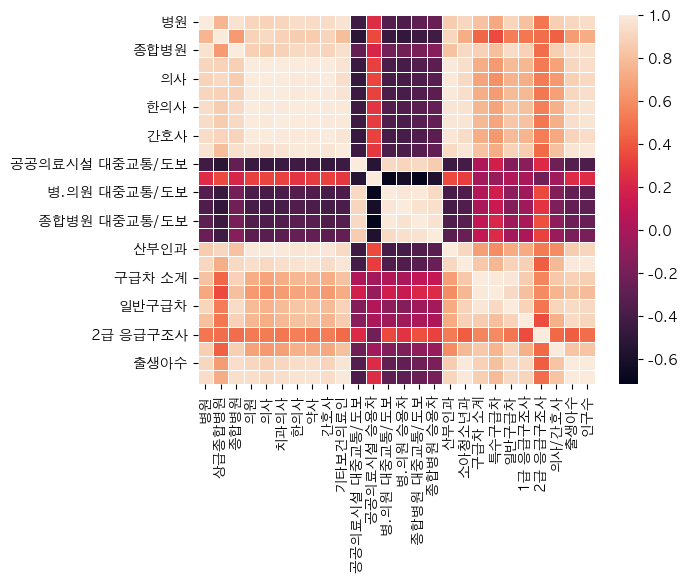

In [13]:
# resultDF[resultDF.index==2020]
sns.heatmap(
    merge2020.corr(),
    # annot=True,
    linewidths= 0.5,
)

<AxesSubplot: >

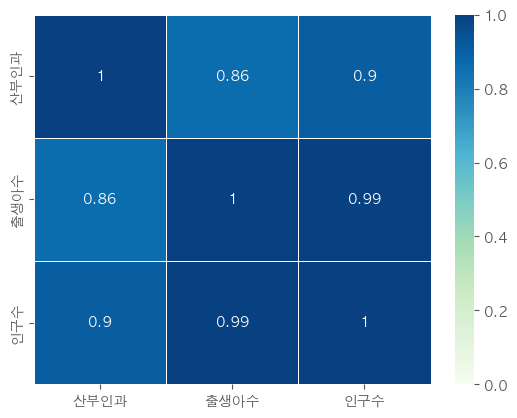

In [69]:
# resultDF[resultDF.index==2020]
sns.heatmap(
    merge2020[['산부인과','출생아수','인구수']].corr(),
    linewidths= 0.5,
    annot=True, # 숫자가 보임 
    # fmt = 'd',
    cmap='GnBu',
    vmin=0, vmax=1
)

In [ ]:
merge2020[['산부인과','출생아수','인구수']].corr()

,산부인과,출생아수,인구수
산부인과,1.000000,0.862262,0.902589
출생아수,0.862262,1.000000,0.993922
인구수,0.902589,0.993922,1.000000


## 전출인구가 처음 임시타겟

In [17]:
tonghab4 = pd.read_csv('../../Data/04.통합.csv')

In [25]:
tonghab4 = tonghab4[['년도','시도','전출인구']]
tonghab4.columns = ['년도','시도별','전출인구']

In [26]:
tonghab4

,년도,시도별,전출인구
0,2013,경기도,1821303
1,2013,서울특별시,1620640
2,2013,경상남도,423864
3,2013,부산광역시,496161
4,2013,대구광역시,363224
...,...,...,...
131,2020,충청북도,226441
132,2020,대전광역시,243418
133,2020,강원도,217897
134,2020,제주특별자치도,94736


In [33]:
Newmerge2020 = merge2020[['산부인과','출생아수','인구수','시도별']]
Newmerge2020['년도'] = Newmerge2020.index
Newmerge2020.reset_index(inplace=True, drop=True)
Newmerge2020

,산부인과,출생아수,인구수,시도별,년도
0,385,47445.0,9668465,서울특별시,2020
1,67,15058.0,3391946,부산광역시,2020
2,87,11193.0,2418346,대구광역시,2020
3,60,16040.0,2942828,인천광역시,2020
4,36,7318.0,1450062,광주광역시,2020
5,44,7481.0,1463882,대전광역시,2020
6,34,6617.0,1136017,울산광역시,2020
7,7,3468.0,355831,세종특별자치시,2020
8,265,77737.0,13427014,경기도,2020
9,32,7835.0,1542840,강원도,2020


In [34]:
Newmerge2020 = pd.merge(left = Newmerge2020, right = tonghab4, how='left', on=['시도별','년도'])

In [37]:
Newmerge2020.drop(columns='년도',inplace=True)
Newmerge2020

,산부인과,출생아수,인구수,시도별,전출인구
0,385,47445.0,9668465,서울특별시,1642977
1,67,15058.0,3391946,부산광역시,506176
2,87,11193.0,2418346,대구광역시,364083
3,60,16040.0,2942828,인천광역시,460304
4,36,7318.0,1450062,광주광역시,232246
5,44,7481.0,1463882,대전광역시,243418
6,34,6617.0,1136017,울산광역시,149696
7,7,3468.0,355831,세종특별자치시,65909
8,265,77737.0,13427014,경기도,1984199
9,32,7835.0,1542840,강원도,217897


In [39]:
Newmerge2020

,산부인과,출생아수,인구수,시도별,전출인구
0,385,47445.0,9668465,서울특별시,1642977
1,67,15058.0,3391946,부산광역시,506176
2,87,11193.0,2418346,대구광역시,364083
3,60,16040.0,2942828,인천광역시,460304
4,36,7318.0,1450062,광주광역시,232246
5,44,7481.0,1463882,대전광역시,243418
6,34,6617.0,1136017,울산광역시,149696
7,7,3468.0,355831,세종특별자치시,65909
8,265,77737.0,13427014,경기도,1984199
9,32,7835.0,1542840,강원도,217897


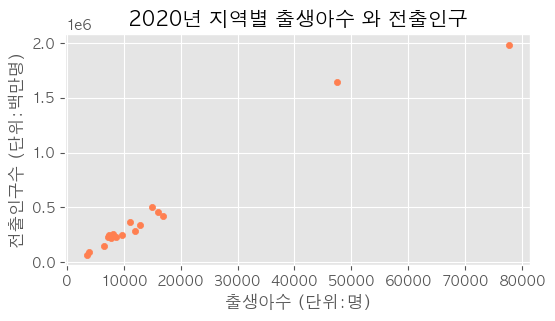

In [59]:
plt.style.use('ggplot')
# plt.style.use('default')
Newmerge2020.plot(
    kind='scatter',
    x = 1,
    y = 4,
    c = 'coral',
    # s = 10, #산점도 점의 크기 
    # s = cylinder_size, #산점도 점의 크기 300은 넘 크다 100으로 줄여야지
    figsize=(6,3)
)
plt.title('2020년 지역별 출생아수 와 전출인구')
plt.xlabel('출생아수 (단위:명)')
plt.ylabel('전출인구수 (단위:백만명)')
# plt.ylim(100000,2000000)
plt.show()